fTrue =  8.035078391532835e-07
Metodo approssimazioni successive g1 
 x = -0.7034672255350977 
 iter_new= 14
Metodo approssimazioni successive g2 
 x = -0.4877585898701766 
 iter_new= 100
Metodo Newton 
 x = -0.7034674683317975 
 iter_new= 4


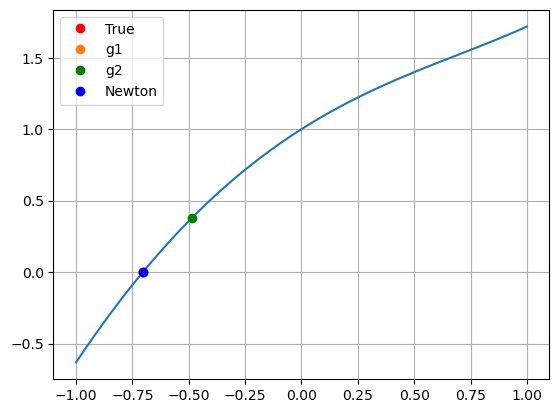

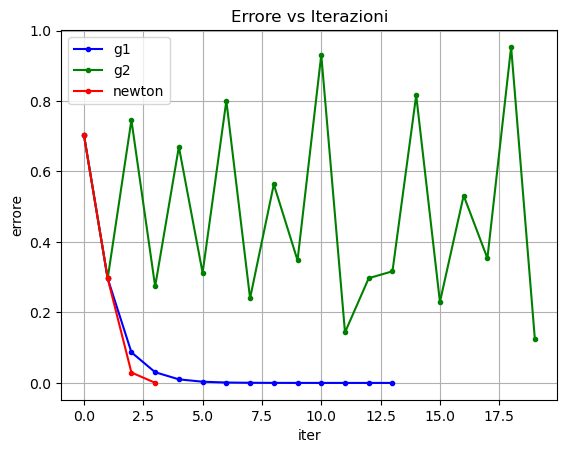

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function approssimazioni successive
def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
    i = 0
    err = np.zeros(maxit + 1, dtype=np.float64)
    err[0] = tolx + 1
    vecErrore = np.zeros(maxit + 1, dtype=np.float64)
    vecErrore[0] = np.linalg.norm(x0 - xTrue)
    x = x0

    while i < maxit and err[i] > tolx and np.abs(f(x)) > tolf:
        x_new = g(x)
        err[i + 1] = np.linalg.norm(x_new - x)
        vecErrore[i + 1] = np.linalg.norm(x_new - xTrue)
        i += 1
        x = x_new

    err = err[0:i]
    vecErrore = vecErrore[0:i]
    return x, i, err, vecErrore

def newton(f, df, tolf, tolx, maxit, xTrue, x0=0):
    g = lambda x: x - f(x) / df(x)
    return succ_app(f, g, tolf, tolx, maxit, xTrue, x0)

# Esercizio 1.1
f = lambda x: np.exp(x) - x**2
df = lambda x: np.exp(x) - 2 * x
g1 = lambda x: x - f(x) * np.exp(x / 2)
g2 = lambda x: x - f(x) * np.exp(-x / 2)

xTrue = -0.703467
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(-1, 1)
fplot = f(xplot)

plt.plot(xplot, fplot)
plt.plot(xTrue, fTrue, 'or', label='True')

tolx = 1e-10
tolf = 1e-6
maxit = 100
x0 = 0

[sol_g1, iter_g1, err_g1, vecErrore_g1] = succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =', sol_g1, '\n iter_new=', iter_g1)

plt.plot(sol_g1, f(sol_g1), 'o', label='g1')

[sol_g2, iter_g2, err_g2, vecErrore_g2] = succ_app(f, g2, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g2 \n x =', sol_g2, '\n iter_new=', iter_g2)

plt.plot(sol_g2, f(sol_g2), 'og', label='g2')

[sol_newton, iter_newton, err_newton, vecErrore_newton] = newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =', sol_newton, '\n iter_new=', iter_newton)

plt.plot(sol_newton, f(sol_newton), 'ob', label='Newton')
plt.legend()
plt.grid()
plt.show()

# GRAFICO Errore vs Iterazioni
plt.plot(vecErrore_g1, '.-', color='blue')
plt.plot(vecErrore_g2[:20], '.-', color='green')
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend(("g1", "g2", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()

fTrue =  1.4366462846027162e-06
Metodo approssimazioni successive g1 
 x = 0.5368384268850389 
 iter_new= 6
Metodo Newton 
 x = 0.5368385507058712 
 iter_new= 4


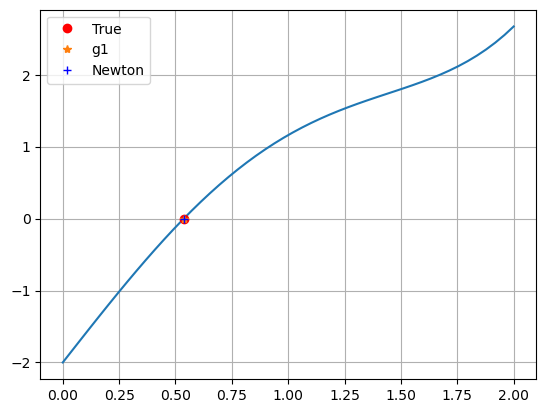

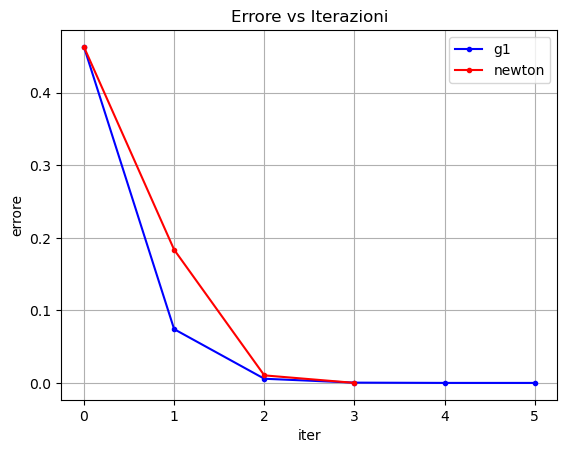

In [3]:
# Esercizio 2.1
f = lambda x: x**3 + 4 * x * np.cos(x) - 2
df = lambda x: 3 * x**2 + 4 * np.cos(x) - 4 * x * np.sin(x)
g1 = lambda x: (2 - x**3) / (4 * np.cos(x))

xTrue = 0.536839
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(0, 2)
fplot = f(xplot)

plt.plot(xplot, fplot)
plt.plot(xTrue, fTrue, 'or', label='True')

tolx = 1e-10
tolf = 1e-6
maxit = 100
x0 = 1

[sol_g1, iter_g1, err_g1, vecErrore_g1] = succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =', sol_g1, '\n iter_new=', iter_g1)

plt.plot(sol_g1, f(sol_g1), '*', label='g1')

[sol_newton, iter_newton, err_newton, vecErrore_newton] = newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =', sol_newton, '\n iter_new=', iter_newton)

plt.plot(sol_newton, f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

# GRAFICO Errore vs Iterazioni
plt.plot(vecErrore_g1, '.-', color='blue')
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend(("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()

fTrue =  -6.822785407889498e-05
Metodo approssimazioni successive g1 
 x = 3.5213789946128164 
 iter_new= 7
Metodo Newton 
 x = 3.5213801473973283 
 iter_new= 2


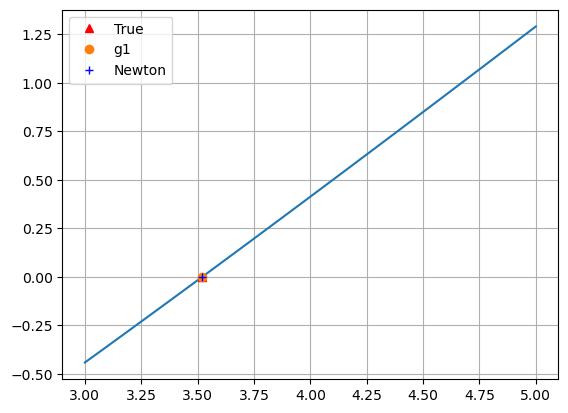

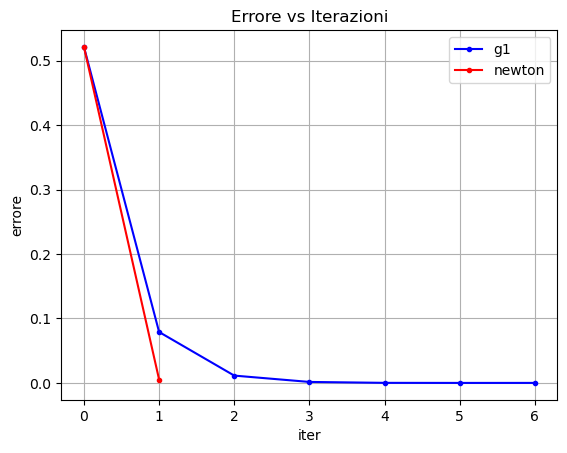

In [5]:
# Esercizio 2.2
f = lambda x: x - x**(1/3) - 2
df = lambda x: 1 - (1/3) * x**(-2/3)
g1 = lambda x: x**(1/3) + 2

xTrue = 3.5213
fTrue = f(xTrue)
print('fTrue = ', fTrue)

xplot = np.linspace(3, 5)
fplot = f(xplot)

plt.plot(xplot, fplot)
plt.plot(xTrue, fTrue, '^r', label='True')

tolx = 1e-10
tolf = 1e-6
maxit = 100
x0 = 3

[sol_g1, iter_g1, err_g1, vecErrore_g1] = succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =', sol_g1, '\n iter_new=', iter_g1)

plt.plot(sol_g1, f(sol_g1), 'o', label='g1')

[sol_newton, iter_newton, err_newton, vecErrore_newton] = newton(f, df, tolf, tolx, maxit, xTrue, x0)
print('Metodo Newton \n x =', sol_newton, '\n iter_new=', iter_newton)

plt.plot(sol_newton, f(sol_newton), '+b', label='Newton')
plt.grid()
plt.legend()
plt.show()

# GRAFICO Errore vs Iterazioni
plt.plot(vecErrore_g1, '.-', color='blue')
plt.plot(vecErrore_newton, '.-', color='red')

plt.legend(("g1", "newton"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()
plt.show()